In [1]:
import sys
sys.path.append('../codes/')

from LanguageProcessor import *

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/egharibnezhad/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# 1. Load the dataset

In [2]:
text_proc = LanguageProcessor()

In [3]:
text_proc.load_data(filepath='../../datasets/real_data/grocery/matches_training.parquet',
        col_a=['base_title', 'base_brand', 'base_size', 'base_description'],
        col_b=['comp_title', 'comp_brand', 'comp_size', 'comp_description'],
        score_col='new_model_score')



✅ Loaded 278495 rows from: ../../datasets/real_data/grocery/matches_training.parquet
Catalog A columns: ['base_title', 'base_brand', 'base_size', 'base_description']
Catalog B columns: ['comp_title', 'comp_brand', 'comp_size', 'comp_description']
Score column: new_model_score



,catalog_base_text,catalog_comp_text,new_model_score
0,"Healthy Choice Power Bowls, Chicken & Quinoa 1...","Weight Watchers Smart Ones, Chicken & Quinoa 1...",0.0
1,Minute Maid Limeade Minute Maid nan Homemade t...,"Sunkist Limes, 10 lb bag Sunkist nan Fresh, ju...",0.0
2,Cheesecake Squares-16 pieces Entenmann's nan D...,Cheesecake Ice Cream-1.5 qt. Edy's nan Creamy ...,0.0
3,"Mission 350 tortilla chips, blue corn, 11 oz. ...","Tostitos 350 tortilla chips, restaurant style ...",0.0
4,"Pork Chop, 4 count Smithfield. 4 ct. Tender an...","Beef Roast, 2 lb. Cargill. 2 lb. Tender and ju...",0.0




 Columns in DataFrame: 

['base_title', 'base_size', 'base_brand', 'base_description', 'base_source_store', 'base_category', 'base_sku', 'comp_title', 'comp_size', 'comp_brand', 'comp_description', 'comp_source_store', 'comp_sku', 'base_uom', 'base_upc', 'base_sub_subcategory', 'match_date', 'base_url', 'comp_sub_subcategory', 'base_subcategory', 'comp_category', 'base_store_name_display', 'base_alt_uom', 'comp_url', 'base_dimensions', 'base_parent_sku', 'comp_shipping_weight', 'comp_price', 'comp_store_name_display', 'base_alt_size', 'base_shipping_weight', 'comp_uom', 'comp_subcategory', 'comp_alt_size', 'comp_parent_sku', 'comp_alt_uom', 'base_price', 'comp_dimensions', 'comp_upc', 'base_img', 'answer', 'comp_sku_uuid', 'base_sku_uuid', 'key', 'uuid_a', 'uuid_b', 'data_source', 'st_score', 'string_sim_score', 'labels', 'current_model_score', 'new_model_score', 'desc_key', 'score', 'dup_key', 'base_uuid', 'comp_uuid', 'row_num', 'catalog_base_text', 'catalog_comp_text']


In [4]:
text_proc.df.head(3)

,base_title,base_size,base_brand,base_description,base_source_store,base_category,base_sku,comp_title,comp_size,comp_brand,...,current_model_score,new_model_score,desc_key,score,dup_key,base_uuid,comp_uuid,row_num,catalog_base_text,catalog_comp_text
0,"Healthy Choice Power Bowls, Chicken & Quinoa 1...",nan,Healthy Choice,"Chicken, quinoa, and vegetables.",llmsynthetic_llmsynthetic,Food,a1d3406e59,"Weight Watchers Smart Ones, Chicken & Quinoa 1...",12 oz.,Weight Watchers,...,0.7183989882469177,0.0,"healthy choice power bowls, chicken & quinoa 1...",nan,nan,nan,nan,nan,"Healthy Choice Power Bowls, Chicken & Quinoa 1...","Weight Watchers Smart Ones, Chicken & Quinoa 1..."
1,Minute Maid Limeade,nan,Minute Maid,"Homemade taste, no artificial flavors",llmsynthetic_llmsynthetic,Produce,1193b16878,"Sunkist Limes, 10 lb bag",nan,Sunkist,...,0.6332633793354034,0.0,"minute maid limeade, 1 gallonsunkist limes, 10...",nan,nan,nan,nan,nan,Minute Maid Limeade Minute Maid nan Homemade t...,"Sunkist Limes, 10 lb bag Sunkist nan Fresh, ju..."
2,Cheesecake Squares-16 pieces,nan,Entenmann's,"Delicious cheesecake squares, individually wra...",llmsynthetic_llmsynthetic,Bakery,b279467c42,Cheesecake Ice Cream-1.5 qt.,nan,Edy's,...,0.762024313211441,0.0,cheesecake squares-16 piecescheesecake ice cre...,nan,nan,nan,nan,nan,Cheesecake Squares-16 pieces Entenmann's nan D...,Cheesecake Ice Cream-1.5 qt. Edy's nan Creamy ...


In [5]:
text_proc.df.describe()

,base_title,base_size,base_brand,base_description,base_source_store,base_category,base_sku,comp_title,comp_size,comp_brand,...,current_model_score,new_model_score,desc_key,score,dup_key,base_uuid,comp_uuid,row_num,catalog_base_text,catalog_comp_text
count,278495,278495,278495,278495,278495,278495,278495,278495,278495,278495,...,198495,198495,198495,278495,198495,198495,198495,198495,278495,278495
unique,179708,9990,26350,97191,4,178,205117,235793,11057,33097,...,195538,1,182052,2,1,1147,14613,4975,200099,256829
top,Big Y 85% Lean 15%Fat Ground Beef,nan,BIGY,,llmsynthetic_llmsynthetic,Grocery,20600200000,"Fresh Strawberries, 1 lb",nan,null,...,1.0,0.0,nan,nan,nan,nan,nan,nan,Big Y 85% Lean 15%Fat Ground Beef BIGY 1.0 null,"Washable Paint, 1 gal. Assorted Colors Melissa..."
freq,373,38361,2619,80007,177757,52288,342,44,32694,8698,...,348,198495,16444,198495,198495,182051,182051,182051,373,33


In [6]:
text_proc.df.columns

Index(['base_title', 'base_size', 'base_brand', 'base_description',
       'base_source_store', 'base_category', 'base_sku', 'comp_title',
       'comp_size', 'comp_brand', 'comp_description', 'comp_source_store',
       'comp_sku', 'base_uom', 'base_upc', 'base_sub_subcategory',
       'match_date', 'base_url', 'comp_sub_subcategory', 'base_subcategory',
       'comp_category', 'base_store_name_display', 'base_alt_uom', 'comp_url',
       'base_dimensions', 'base_parent_sku', 'comp_shipping_weight',
       'comp_price', 'comp_store_name_display', 'base_alt_size',
       'base_shipping_weight', 'comp_uom', 'comp_subcategory', 'comp_alt_size',
       'comp_parent_sku', 'comp_alt_uom', 'base_price', 'comp_dimensions',
       'comp_upc', 'base_img', 'answer', 'comp_sku_uuid', 'base_sku_uuid',
       'key', 'uuid_a', 'uuid_b', 'data_source', 'st_score',
       'string_sim_score', 'labels', 'current_model_score', 'new_model_score',
       'desc_key', 'score', 'dup_key', 'base_uuid', 'comp_u

In [7]:
text_proc.df.catalog_base_text[:3], text_proc.df.catalog_comp_text[:3]

(0    Healthy Choice Power Bowls, Chicken & Quinoa 1...
 1    Minute Maid Limeade Minute Maid nan Homemade t...
 2    Cheesecake Squares-16 pieces Entenmann's nan D...
 Name: catalog_base_text, dtype: object,
 0    Weight Watchers Smart Ones, Chicken & Quinoa 1...
 1    Sunkist Limes, 10 lb bag Sunkist nan Fresh, ju...
 2    Cheesecake Ice Cream-1.5 qt. Edy's nan Creamy ...
 Name: catalog_comp_text, dtype: object)

# 2. Tokenize


Before encoding or comparing texts, we normalize them to reduce noise.

Common techniques:

    - Lowercasing
    - Removing punctuation
    - Removing extra whitespace
    - Tokenization (splitting into words)

Why?
It improves consistency and reduces variability.

In [8]:
text_proc.tokenize_columns(df = text_proc.df, columns=['catalog_base_text','catalog_comp_text'] )

,catalog_base_text,catalog_comp_text,catalog_base_text_token,catalog_comp_text_token
0,"Healthy Choice Power Bowls, Chicken & Quinoa 1...","Weight Watchers Smart Ones, Chicken & Quinoa 1...",healthy choice power bowls chicken quinoa 12 o...,weight watchers smart ones chicken quinoa 11 o...
1,Minute Maid Limeade Minute Maid nan Homemade t...,"Sunkist Limes, 10 lb bag Sunkist nan Fresh, ju...",minute maid limeade minute maid nan homemade t...,sunkist limes 10 lb bag sunkist nan fresh juic...
2,Cheesecake Squares-16 pieces Entenmann's nan D...,Cheesecake Ice Cream-1.5 qt. Edy's nan Creamy ...,cheesecake squares16 pieces entenmanns nan del...,cheesecake ice cream15 qt edys nan creamy chee...
3,"Mission 350 tortilla chips, blue corn, 11 oz. ...","Tostitos 350 tortilla chips, restaurant style ...",mission 350 tortilla chips blue corn 11 oz mis...,tostitos 350 tortilla chips restaurant style t...
4,"Pork Chop, 4 count Smithfield. 4 ct. Tender an...","Beef Roast, 2 lb. Cargill. 2 lb. Tender and ju...",pork chop 4 count smithfield 4 ct tender and j...,beef roast 2 lb cargill 2 lb tender and juicy ...


## 3. Jaccard Similarity Function


The `jaccard_similarity()` function calculates the **Jaccard Index**, a classic metric for measuring the similarity between two sets of tokens (words). Here's a breakdown of how it works:

**Formula**:

   $$
   \text{Jaccard}(A, B) = \frac{|A \cap B|}{|A \cup B|}
   $$

   * $A$ and $B$ are sets of tokens from each input string.
   * $|A \cap B|$ is the size of the intersection.
   * $|A \cup B|$ is the size of the union.

The score ranges from **0 to 1**:

* **0** → no common words
* **1** → identical token sets

---

### Why It's Useful

While **semantic similarity models** (like SBERT) capture meaning, Jaccard focuses purely on **surface-level lexical overlap** — the words themselves.

This is especially useful when:

* Product names contain shared keywords (e.g., model numbers, storage capacity, brand).
* You want a fast, interpretable similarity measure.
* Synonym handling isn't necessary.

,index_a,index_b,catalog_base,catalog_comp,catalog_base_clean,catalog_comp_clean,jaccard_score
0,0,0,healthy choice power bowls chicken quinoa 12 o...,weight watchers smart ones chicken quinoa 11 o...,healthy choice power bowls chicken quinoa 12 o...,weight watchers smart ones chicken quinoa 11 o...,0.375000
1,0,1,healthy choice power bowls chicken quinoa 12 o...,sunkist limes 10 lb bag sunkist nan fresh juic...,healthy choice power bowls chicken quinoa 12 o...,sunkist limes 10 lb bag sunkist nan fresh juic...,0.055556
2,0,2,healthy choice power bowls chicken quinoa 12 o...,cheesecake ice cream15 qt edys nan creamy chee...,healthy choice power bowls chicken quinoa 12 o...,cheesecake ice cream15 qt edys nan creamy chee...,0.047619
3,0,3,healthy choice power bowls chicken quinoa 12 o...,tostitos 350 tortilla chips restaurant style t...,healthy choice power bowls chicken quinoa 12 o...,tostitos 350 tortilla chips restaurant style t...,0.055556
4,0,4,healthy choice power bowls chicken quinoa 12 o...,beef roast 2 lb cargill 2 lb tender and juicy ...,healthy choice power bowls chicken quinoa 12 o...,beef roast 2 lb cargill 2 lb tender and juicy ...,0.031250


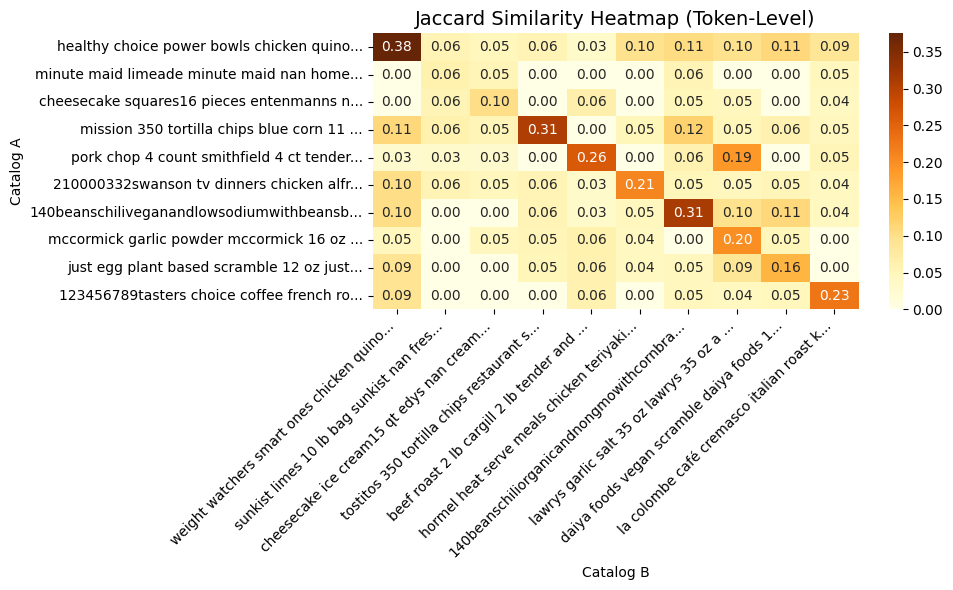

✅ Jaccard heatmap saved to: ../../outputs/


<Figure size 640x480 with 0 Axes>

In [9]:
text_proc.compute_pairwise_jaccard(col_a='catalog_base_text_token', col_b='catalog_comp_text_token')


# 4. Semantic Embedding

This step **converts each string from text into a dense numeric vector** called an *embedding*. The embeddings capture the semantic meaning of the sentences, allowing us to compare products beyond exact word matches.

* `catalog_a_clean` and `catalog_b_clean` are lists of preprocessed product titles (lowercased, punctuation removed).
* `model.encode()` passes each title through the Sentence-BERT (`SBERT`) model, which outputs a fixed-length vector representing the semantic content.
* `convert_to_tensor=True` ensures embeddings are returned as PyTorch tensors for fast GPU-enabled operations.

---

### Why Semantic Embeddings?

Traditional text similarity metrics (like Jaccard or simple token overlap) only measure surface-level lexical similarity. In contrast, **semantic embeddings** encode the *meaning* of sentences in a high-dimensional vector space.

* Embeddings allow us to recognize paraphrases, synonyms, and related concepts.
* For example:

  * `"Apple iPhone 13 Pro Max 128GB"`
  * `"iPhone 13 Pro Max 128 GB in Silver color"`
    Though worded differently, these have similar embeddings because they describe the same product.

---

### How Does SBERT Generate Embeddings?

SBERT builds on top of BERT and adapts it to produce meaningful sentence vectors:

1. **Tokenization**
   Input text is split into subword tokens using WordPiece or similar methods.

2. **Contextual Encoding**
   Tokens are passed through transformer layers to produce **contextual embeddings** — vectors for each token enriched by surrounding context.

3. **Pooling Layer**
   To get a *single* vector per sentence, SBERT applies a pooling operation over token embeddings. The most common is **mean pooling**: averaging token embeddings along the sequence length dimension.

4. **Final Embedding Vector**
   The result is a fixed-size vector (typically 768 dimensions for base models) representing the entire sentence’s semantic information.

---

### Mathematical Representation

* Let a sentence $S$ be tokenized into $T = [t_1, t_2, ..., t_n]$.
* SBERT produces contextual token embeddings:

$$
E = [\mathbf{e}_1, \mathbf{e}_2, ..., \mathbf{e}_n], \quad \mathbf{e}_i \in \mathbb{R}^d
$$

where $d$ is the embedding dimension (e.g., 768).

* The pooled sentence embedding $\mathbf{s}$ is computed as:

$$
\mathbf{s} = \frac{1}{n} \sum_{i=1}^n \mathbf{e}_i
$$

This vector $\mathbf{s} \in \mathbb{R}^d$ captures the semantic meaning of the sentence.

---

### Properties of SBERT Embeddings

* **Semantic Similarity**: Sentences with similar meaning produce embeddings close in the vector space.
* **Vector Space Geometry**: You can measure similarity via cosine similarity:

$$
\text{cosine\_sim}(\mathbf{s}_1, \mathbf{s}_2) = \frac{\mathbf{s}_1 \cdot \mathbf{s}_2}{\|\mathbf{s}_1\| \|\mathbf{s}_2\|}
$$

which ranges from -1 (opposite) to 1 (identical).

* **Transfer Learning**: SBERT is pretrained on large datasets with human-labeled semantic similarity scores, enabling it to generalize well to new text.

---

In [10]:
text_proc.load_sentence_transformer_model(
        model_name_or_path = "sentence-transformers/all-mpnet-base-v2",
        local_dir = "../../models/"
)


🔍 Loading model from local path: ../../models/sentence-transformers_all-mpnet-base-v2
✅ Model loaded!
📄 Model Config:
 - Model type: mpnet
 - Hidden size: 768
 - Num layers: 12
 - Num attention heads: 12
 - Total parameters: 109.5M


Added embeddings for column 'catalog_base_text_token' as 'catalog_base_text_token_embedding'
Added embeddings for column 'catalog_comp_text_token' as 'catalog_comp_text_token_embedding'


/home/egharibnezhad/projects/product-matching-LLMs-project/ProductMatching-LLMs/notebooks/../codes/LanguageProcessor.py:414: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f"{col}_embedding"] = [emb.numpy() for emb in embeddings_cpu]
/home/egharibnezhad/projects/product-matching-LLMs-project/ProductMatching-LLMs/notebooks/../codes/LanguageProcessor.py:414: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f"{col}_embedding"] = [emb.numpy() for emb in embeddings_cpu]


,base_title,base_size,base_brand,base_description,base_source_store,base_category,base_sku,comp_title,comp_size,comp_brand,...,dup_key,base_uuid,comp_uuid,row_num,catalog_base_text,catalog_comp_text,catalog_base_text_token,catalog_comp_text_token,catalog_base_text_token_embedding,catalog_comp_text_token_embedding
0,"Healthy Choice Power Bowls, Chicken & Quinoa 1...",nan,Healthy Choice,"Chicken, quinoa, and vegetables.",llmsynthetic_llmsynthetic,Food,a1d3406e59,"Weight Watchers Smart Ones, Chicken & Quinoa 1...",12 oz.,Weight Watchers,...,nan,nan,nan,nan,"Healthy Choice Power Bowls, Chicken & Quinoa 1...","Weight Watchers Smart Ones, Chicken & Quinoa 1...",healthy choice power bowls chicken quinoa 12 o...,weight watchers smart ones chicken quinoa 11 o...,"[-0.0017249219, 0.064510845, -0.012665335, -0....","[-0.027806535, -0.0043320465, 0.018750923, -0...."
1,Minute Maid Limeade,nan,Minute Maid,"Homemade taste, no artificial flavors",llmsynthetic_llmsynthetic,Produce,1193b16878,"Sunkist Limes, 10 lb bag",nan,Sunkist,...,nan,nan,nan,nan,Minute Maid Limeade Minute Maid nan Homemade t...,"Sunkist Limes, 10 lb bag Sunkist nan Fresh, ju...",minute maid limeade minute maid nan homemade t...,sunkist limes 10 lb bag sunkist nan fresh juic...,"[0.04838592, 0.068929374, -0.01769359, -0.0116...","[0.030106023, 0.07652367, -0.021726953, 0.0020..."
2,Cheesecake Squares-16 pieces,nan,Entenmann's,"Delicious cheesecake squares, individually wra...",llmsynthetic_llmsynthetic,Bakery,b279467c42,Cheesecake Ice Cream-1.5 qt.,nan,Edy's,...,nan,nan,nan,nan,Cheesecake Squares-16 pieces Entenmann's nan D...,Cheesecake Ice Cream-1.5 qt. Edy's nan Creamy ...,cheesecake squares16 pieces entenmanns nan del...,cheesecake ice cream15 qt edys nan creamy chee...,"[-0.014384394, -0.022661705, 0.009103672, 0.07...","[0.0040928964, -0.0151848905, 0.014308703, 0.0..."
3,"Mission 350 tortilla chips, blue corn, 11 oz.",nan,Mission,Mission Blue Corn 350 Tortilla Chips.,llmsynthetic_llmsynthetic,Grocery,d491525992,"Tostitos 350 tortilla chips, restaurant style",14 oz.,Tostitos,...,nan,nan,nan,nan,"Mission 350 tortilla chips, blue corn, 11 oz. ...","Tostitos 350 tortilla chips, restaurant style ...",mission 350 tortilla chips blue corn 11 oz mis...,tostitos 350 tortilla chips restaurant style t...,"[-0.0071086343, -0.015733203, 0.0049940827, -0...","[-0.029786088, -0.02991279, 0.00597764, 0.0033..."
4,"Pork Chop, 4 count",4 ct.,Smithfield.,"Tender and juicy pork chop, marinated with a s...",llmsynthetic_llmsynthetic,Fresh Meat,26cb5c90e8,"Beef Roast, 2 lb.",2 lb.,Cargill.,...,nan,nan,nan,nan,"Pork Chop, 4 count Smithfield. 4 ct. Tender an...","Beef Roast, 2 lb. Cargill. 2 lb. Tender and ju...",pork chop 4 count smithfield 4 ct tender and j...,beef roast 2 lb cargill 2 lb tender and juicy ...,"[-0.02833205, 0.034043733, 0.009789846, -0.055...","[-0.039343607, 0.005624292, 0.008297887, -0.01..."


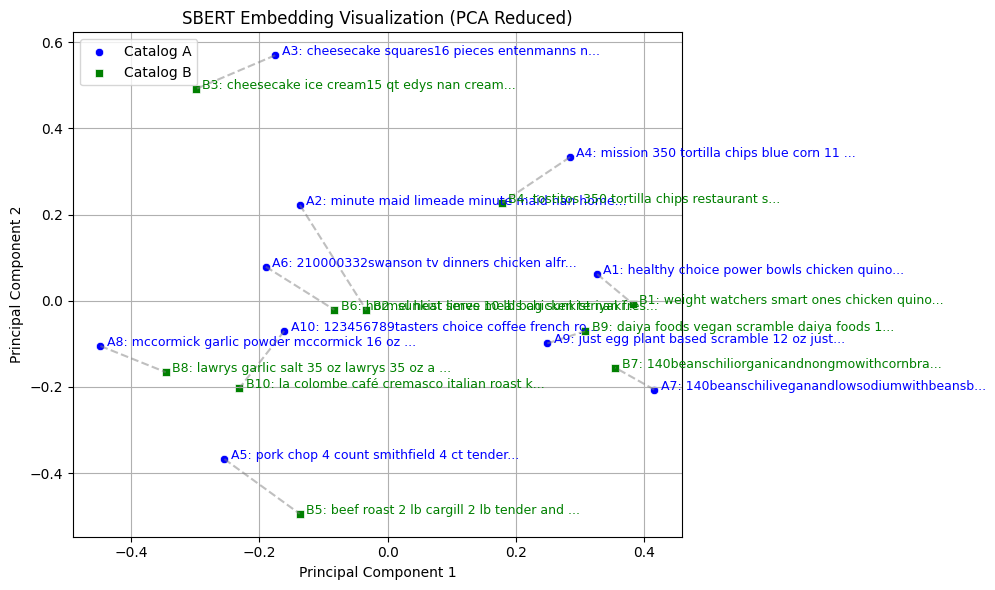

In [11]:
text_proc.compute_semantic_embeddings(df = text_proc.df.iloc[:10], columns=['catalog_base_text_token',
                                                                            'catalog_comp_text_token'])

In [12]:
text_proc.df.head()

,base_title,base_size,base_brand,base_description,base_source_store,base_category,base_sku,comp_title,comp_size,comp_brand,...,dup_key,base_uuid,comp_uuid,row_num,catalog_base_text,catalog_comp_text,catalog_base_text_token,catalog_comp_text_token,catalog_base_text_token_embedding,catalog_comp_text_token_embedding
0,"Healthy Choice Power Bowls, Chicken & Quinoa 1...",nan,Healthy Choice,"Chicken, quinoa, and vegetables.",llmsynthetic_llmsynthetic,Food,a1d3406e59,"Weight Watchers Smart Ones, Chicken & Quinoa 1...",12 oz.,Weight Watchers,...,nan,nan,nan,nan,"Healthy Choice Power Bowls, Chicken & Quinoa 1...","Weight Watchers Smart Ones, Chicken & Quinoa 1...",healthy choice power bowls chicken quinoa 12 o...,weight watchers smart ones chicken quinoa 11 o...,"[-0.0017249219, 0.064510845, -0.012665335, -0....","[-0.027806535, -0.0043320465, 0.018750923, -0...."
1,Minute Maid Limeade,nan,Minute Maid,"Homemade taste, no artificial flavors",llmsynthetic_llmsynthetic,Produce,1193b16878,"Sunkist Limes, 10 lb bag",nan,Sunkist,...,nan,nan,nan,nan,Minute Maid Limeade Minute Maid nan Homemade t...,"Sunkist Limes, 10 lb bag Sunkist nan Fresh, ju...",minute maid limeade minute maid nan homemade t...,sunkist limes 10 lb bag sunkist nan fresh juic...,"[0.04838592, 0.068929374, -0.01769359, -0.0116...","[0.030106023, 0.07652367, -0.021726953, 0.0020..."
2,Cheesecake Squares-16 pieces,nan,Entenmann's,"Delicious cheesecake squares, individually wra...",llmsynthetic_llmsynthetic,Bakery,b279467c42,Cheesecake Ice Cream-1.5 qt.,nan,Edy's,...,nan,nan,nan,nan,Cheesecake Squares-16 pieces Entenmann's nan D...,Cheesecake Ice Cream-1.5 qt. Edy's nan Creamy ...,cheesecake squares16 pieces entenmanns nan del...,cheesecake ice cream15 qt edys nan creamy chee...,"[-0.014384394, -0.022661705, 0.009103672, 0.07...","[0.0040928964, -0.0151848905, 0.014308703, 0.0..."
3,"Mission 350 tortilla chips, blue corn, 11 oz.",nan,Mission,Mission Blue Corn 350 Tortilla Chips.,llmsynthetic_llmsynthetic,Grocery,d491525992,"Tostitos 350 tortilla chips, restaurant style",14 oz.,Tostitos,...,nan,nan,nan,nan,"Mission 350 tortilla chips, blue corn, 11 oz. ...","Tostitos 350 tortilla chips, restaurant style ...",mission 350 tortilla chips blue corn 11 oz mis...,tostitos 350 tortilla chips restaurant style t...,"[-0.0071086343, -0.015733203, 0.0049940827, -0...","[-0.029786088, -0.02991279, 0.00597764, 0.0033..."
4,"Pork Chop, 4 count",4 ct.,Smithfield.,"Tender and juicy pork chop, marinated with a s...",llmsynthetic_llmsynthetic,Fresh Meat,26cb5c90e8,"Beef Roast, 2 lb.",2 lb.,Cargill.,...,nan,nan,nan,nan,"Pork Chop, 4 count Smithfield. 4 ct. Tender an...","Beef Roast, 2 lb. Cargill. 2 lb. Tender and ju...",pork chop 4 count smithfield 4 ct tender and j...,beef roast 2 lb cargill 2 lb tender and juicy ...,"[-0.02833205, 0.034043733, 0.009789846, -0.055...","[-0.039343607, 0.005624292, 0.008297887, -0.01..."


# 5. Cosine Similarity


```python
semantic_sim = util.cos_sim(embeddings_a, embeddings_b).cpu().numpy()
````

* **What it does:**
  This line calculates the **cosine similarity** between the sentence embeddings of two catalogs (`catalog_a` and `catalog_b`).

* **Why cosine similarity?**
  Cosine similarity measures the cosine of the angle between two vectors in a high-dimensional space:

  $$
  \text{cosine\_sim}(\mathbf{u}, \mathbf{v}) = \frac{\mathbf{u} \cdot \mathbf{v}}{\|\mathbf{u}\| \|\mathbf{v}\|}
  $$

  where:

  * $\mathbf{u}$ and $\mathbf{v}$ are embedding vectors for two sentences
  * $\cdot$ denotes the dot product
  * $\|\mathbf{u}\|$ and $\|\mathbf{v}\|$ are vector magnitudes (Euclidean norms)

* **Interpretation:**

  * Values range from -1 (completely opposite) to 1 (identical).
  * Higher scores mean higher semantic similarity, capturing meaning even when wording differs.

* **Details:**

  * `util.cos_sim` computes pairwise cosine similarities between all embeddings in `embeddings_a` and `embeddings_b`.
  * The result is a 2D matrix `semantic_sim` of shape `(len(catalog_a), len(catalog_b))`.
  * `.cpu().numpy()` transfers tensors to CPU and converts them to NumPy arrays for easy manipulation.



,index_a,index_b,catalog_base,catalog_comp,cosine_score
0,0,0,healthy choice power bowls chicken quinoa 12 o...,weight watchers smart ones chicken quinoa 11 o...,0.753589
1,0,1,healthy choice power bowls chicken quinoa 12 o...,sunkist limes 10 lb bag sunkist nan fresh juic...,0.362983
2,0,2,healthy choice power bowls chicken quinoa 12 o...,cheesecake ice cream15 qt edys nan creamy chee...,0.330931
3,0,3,healthy choice power bowls chicken quinoa 12 o...,tostitos 350 tortilla chips restaurant style t...,0.387588
4,0,4,healthy choice power bowls chicken quinoa 12 o...,beef roast 2 lb cargill 2 lb tender and juicy ...,0.276417


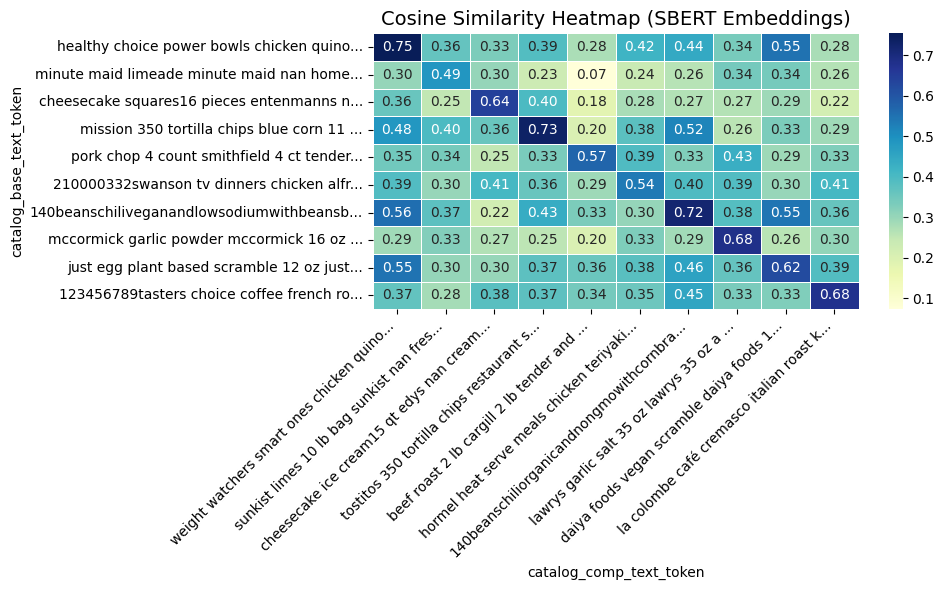

,index_a,index_b,catalog_base,catalog_comp,cosine_score
0,0,0,healthy choice power bowls chicken quinoa 12 o...,weight watchers smart ones chicken quinoa 11 o...,0.753589
1,0,1,healthy choice power bowls chicken quinoa 12 o...,sunkist limes 10 lb bag sunkist nan fresh juic...,0.362983
2,0,2,healthy choice power bowls chicken quinoa 12 o...,cheesecake ice cream15 qt edys nan creamy chee...,0.330931
3,0,3,healthy choice power bowls chicken quinoa 12 o...,tostitos 350 tortilla chips restaurant style t...,0.387588
4,0,4,healthy choice power bowls chicken quinoa 12 o...,beef roast 2 lb cargill 2 lb tender and juicy ...,0.276417
...,...,...,...,...,...
95,9,5,123456789tasters choice coffee french roast kc...,hormel heat serve meals chicken teriyaki 105 o...,0.351897
96,9,6,123456789tasters choice coffee french roast kc...,140beanschiliorganicandnongmowithcornbrandttt ...,0.450853
97,9,7,123456789tasters choice coffee french roast kc...,lawrys garlic salt 35 oz lawrys 35 oz a blend ...,0.334890
98,9,8,123456789tasters choice coffee french roast kc...,daiya foods vegan scramble daiya foods 12 oz p...,0.326515


In [13]:
text_proc.compute_pairwise_cosine_similarity(
    emb_col_a = "catalog_base_text_token_embedding",
    emb_col_b = "catalog_comp_text_token_embedding",
    raw_col_a = 'catalog_base_text_token',
    raw_col_b = 'catalog_comp_text_token',
)



🔝 Top combined similarity pairs:
[0, 0] (healthy choice power bowls chicken quinoa 12 oz healthy choice nan chicken quinoa and vegetables ↔ weight watchers smart ones chicken quinoa 11 oz weight watchers 12 oz chicken quinoa and vegetables) → 0.6779
[3, 3] (mission 350 tortilla chips blue corn 11 oz mission nan mission blue corn 350 tortilla chips ↔ tostitos 350 tortilla chips restaurant style tostitos 14 oz tostitos restaurant style 350 tortilla chips) → 0.6477
[6, 6] (140beanschiliveganandlowsodiumwithbeansbrandsss vegan and low sodium with beans 15 oz 140 beans chili vegan and low sodium with beans ↔ 140beanschiliorganicandnongmowithcornbrandttt organic and nongmo with corn nan 140 beans chili organic and nongmo with corn) → 0.6363
[9, 9] (123456789tasters choice coffee french roast kcups 12 count tasters choice 12 count french roast coffee rich and bold flavor ↔ la colombe café cremasco italian roast kcups 10 count la colombe nan italian roast coffee smooth and creamy) → 0.5875
[7

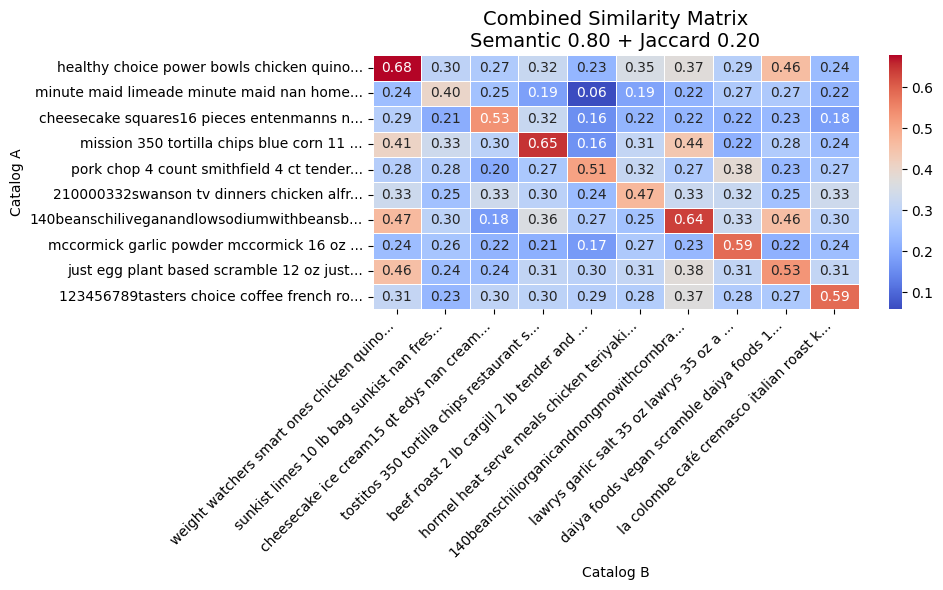

In [14]:
text_proc.combine_similarities()

# 6. KNN Similarity 

HNSWlib is a Python library that implements Hierarchical Navigable Small Worlds (HNSW), an efficient algorithm for approximate nearest neighbor (ANN) search. While traditional k-Nearest Neighbors (KNN) performs an exhaustive search, which can be slow for large datasets, HNSWlib offers a faster alternative by building a multi-layered graph structure.

Key aspects of KNN similarity using HNSWlib in Python:

- Approximate Nearest Neighbors (ANN):
HNSWlib focuses on ANN, meaning it finds neighbors that are approximately the closest, rather than guaranteeing the absolute closest. This trade-off between speed and perfect accuracy is often acceptable for large-scale similarity searches.

- Graph-based Indexing:
HNSW builds a graph where data points are nodes and edges represent connections. This structure allows for efficient traversal to find similar points.

- Distance Metrics:
    - HNSWlib supports various distance metrics for determining similarity, including:
    - Squared L2 (Euclidean distance): l2
    - Inner Product: ip
    - Cosine Similarity: cosine

In [25]:
list(text_proc.df[['catalog_base_text']].iloc[0])

['Healthy Choice Power Bowls, Chicken & Quinoa 12 oz Healthy Choice nan Chicken, quinoa, and vegetables.']

In [27]:
text_proc.df['catalog_base_text_token'].iloc[0]

'healthy choice power bowls chicken quinoa 12 oz healthy choice nan chicken quinoa and vegetables'

,index_a,index_b,catalog_base,catalog_comp,similarity
0,0,0,healthy choice power bowls chicken quinoa 12 o...,weight watchers smart ones chicken quinoa 11 o...,0.753589
1,0,8,healthy choice power bowls chicken quinoa 12 o...,daiya foods vegan scramble daiya foods 12 oz p...,0.549332
2,0,6,healthy choice power bowls chicken quinoa 12 o...,140beanschiliorganicandnongmowithcornbrandttt ...,0.442409
3,0,5,healthy choice power bowls chicken quinoa 12 o...,hormel heat serve meals chicken teriyaki 105 o...,0.417333
4,0,3,healthy choice power bowls chicken quinoa 12 o...,tostitos 350 tortilla chips restaurant style t...,0.387588


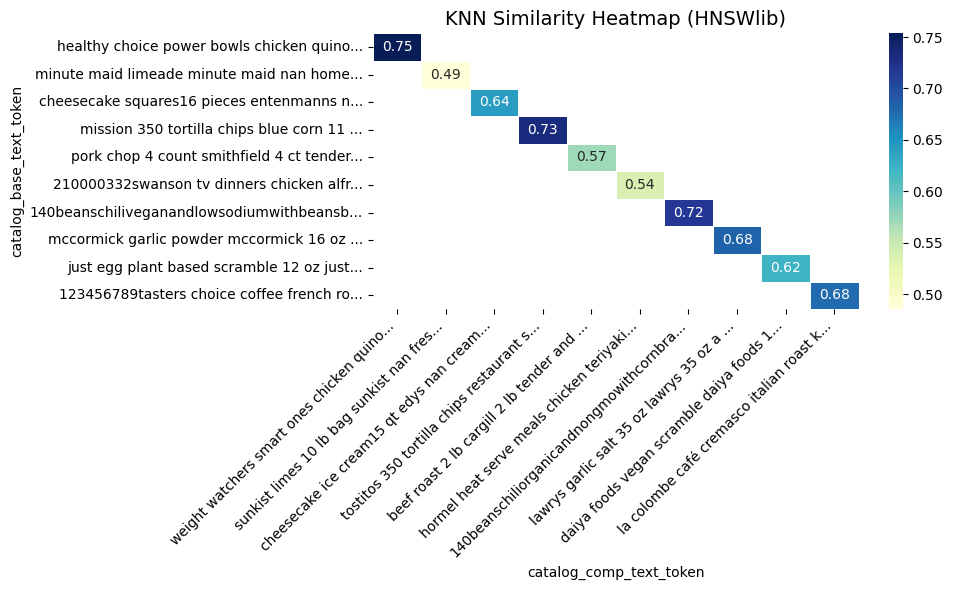

,index_a,index_b,catalog_base,catalog_comp,similarity
0,0,0,healthy choice power bowls chicken quinoa 12 o...,weight watchers smart ones chicken quinoa 11 o...,0.753589
1,0,8,healthy choice power bowls chicken quinoa 12 o...,daiya foods vegan scramble daiya foods 12 oz p...,0.549332
2,0,6,healthy choice power bowls chicken quinoa 12 o...,140beanschiliorganicandnongmowithcornbrandttt ...,0.442409
3,0,5,healthy choice power bowls chicken quinoa 12 o...,hormel heat serve meals chicken teriyaki 105 o...,0.417333
4,0,3,healthy choice power bowls chicken quinoa 12 o...,tostitos 350 tortilla chips restaurant style t...,0.387588
5,1,1,minute maid limeade minute maid nan homemade t...,sunkist limes 10 lb bag sunkist nan fresh juic...,0.485467
6,1,7,minute maid limeade minute maid nan homemade t...,lawrys garlic salt 35 oz lawrys 35 oz a blend ...,0.342409
7,1,8,minute maid limeade minute maid nan homemade t...,daiya foods vegan scramble daiya foods 12 oz p...,0.340386
8,1,0,minute maid limeade minute maid nan homemade t...,weight watchers smart ones chicken quinoa 11 o...,0.303534
9,1,2,minute maid limeade minute maid nan homemade t...,cheesecake ice cream15 qt edys nan creamy chee...,0.303359


In [21]:
text_proc.compute_knn_similarity(
    emb_col_a = "catalog_base_text_token_embedding",
    emb_col_b = "catalog_comp_text_token_embedding",
    raw_col_a = 'catalog_base_text_token',
    raw_col_b = 'catalog_comp_text_token',
    space = 'cosine'
)

In [16]:
text_proc.save_matches_to_csv()

AttributeError: 'LanguageProcessor' object has no attribute 'catalog_base_clean'